In [1]:
import sqlite3
import pandas as pd
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
app = pd.read_csv('app_sess.csv')

In [3]:
prod = pd.read_csv('products.csv')

In [4]:
order = pd.read_csv('orders.csv')

In [5]:
orprod = pd.read_csv('orders_product.csv')

In [6]:
cust = pd.read_csv('customers.csv')

In [7]:
inf = pd.read_csv('info.csv')

In [8]:
delivery = pd.merge(order,orprod,left_on='order_id',right_on='order_id',how='inner')

In [9]:
delivery = pd.merge(delivery,prod,left_on='product_id',right_on='product_id',how='inner')

In [10]:
delivery = pd.merge(delivery,cust,left_on='customer_id',right_on='customer_id',how='inner')

In [11]:
delivery = pd.merge(delivery,app,left_on='customer_id',right_on='customer_id',how='inner')

In [12]:
delivery = pd.merge(delivery,inf,left_on='order_id',right_on='order_id',how='inner')

In [13]:
delivery

,order_id,customer_id,order_dt,payment_method,product_id,amount,product_group_name,product_name,Price,last_name,...,phone_number,birth_dt,address,session_id,start_dttm,finish_dttm,device_name,delivery_id,delivery_dt,is_completed_flg
0,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,380,06.12.21 7:06,07.12.21 8:38,MacOS,81,17-01-2022,True
1,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,380,06.12.21 7:06,07.12.21 8:38,MacOS,1006,24-12-2021,True
2,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,380,06.12.21 7:06,07.12.21 8:38,MacOS,1241,04-01-2022,True
3,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,380,06.12.21 7:06,07.12.21 8:38,MacOS,2017,18-12-2021,False
4,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,716,06.12.21 15:38,08.12.21 2:40,MacOS,81,17-01-2022,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67462,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,862044.0,14.11.1971,Ачинск,3333,19.04.23 14:07,19.04.23 15:19,Android,773,18-04-2023,False
67463,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,862044.0,14.11.1971,Ачинск,3590,19.04.23 13:48,20.04.23 10:04,MacOS,773,18-04-2023,False
67464,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,862044.0,14.11.1971,Ачинск,4417,19.04.23 4:38,19.04.23 14:13,Ubuntu,773,18-04-2023,False
67465,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,862044.0,14.11.1971,Ачинск,4678,19.04.23 7:44,20.04.23 11:03,Android,773,18-04-2023,False


In [14]:
delivery.isnull().sum()

order_id              0
customer_id           0
order_dt              0
payment_method        0
product_id            0
amount                0
product_group_name    0
product_name          0
Price                 0
last_name             0
first_name            0
middle_name           0
phone_number          0
birth_dt              0
address               0
session_id            0
start_dttm            0
finish_dttm           0
device_name           0
delivery_id           0
delivery_dt           0
is_completed_flg      0
dtype: int64

In [15]:
delivery.duplicated().sum()

0

In [19]:
delivery['start_dttm']=pd.to_datetime(delivery['start_dttm'])
delivery['finish_dttm']=pd.to_datetime(delivery['finish_dttm'])

In [20]:
delivery['delivery_time'] = delivery['finish_dttm'] - delivery['start_dttm']

In [21]:
delivery['delivery_time'] = delivery['delivery_time'].dt.floor("D")

In [24]:
delivery = delivery.drop(['start_dttm','finish_dttm'],axis=1)

In [25]:
delivery['delivery_time'] = pd.to_numeric(delivery['delivery_time'])

In [26]:
delivery['delivery_time'] = delivery['delivery_time'].apply(lambda x:round(x/86400))

In [27]:
delivery['delivery_time'] = delivery['delivery_time'].apply(lambda x:x/1000000000)

In [28]:
delivery['delivery_time'] = delivery['delivery_time'].astype("Int64")

In [30]:
delivery

,order_id,customer_id,order_dt,payment_method,product_id,amount,product_group_name,product_name,Price,last_name,...,middle_name,phone_number,birth_dt,address,session_id,device_name,delivery_id,delivery_dt,is_completed_flg,delivery_time
0,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,380,MacOS,81,17-01-2022,True,30
1,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,380,MacOS,1006,24-12-2021,True,30
2,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,380,MacOS,1241,04-01-2022,True,30
3,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,380,MacOS,2017,18-12-2021,False,30
4,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,716,MacOS,81,17-01-2022,True,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67462,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,Ярославовна,862044.0,14.11.1971,Ачинск,3333,Android,773,18-04-2023,False,0
67463,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,Ярославовна,862044.0,14.11.1971,Ачинск,3590,MacOS,773,18-04-2023,False,0
67464,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,Ярославовна,862044.0,14.11.1971,Ачинск,4417,Ubuntu,773,18-04-2023,False,0
67465,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,Ярославовна,862044.0,14.11.1971,Ачинск,4678,Android,773,18-04-2023,False,1


In [32]:
delivery = delivery.loc[delivery['delivery_time'].isin([0,1])]

In [33]:
delivery

,order_id,customer_id,order_dt,payment_method,product_id,amount,product_group_name,product_name,Price,last_name,...,middle_name,phone_number,birth_dt,address,session_id,device_name,delivery_id,delivery_dt,is_completed_flg,delivery_time
16,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,2150,Android,81,17-01-2022,True,0
17,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,2150,Android,1006,24-12-2021,True,0
18,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,2150,Android,1241,04-01-2022,True,0
19,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,2150,Android,2017,18-12-2021,False,0
24,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,Глебович,800533.0,22.04.1999,Уссурийск,3680,MacOS,81,17-01-2022,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67462,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,Ярославовна,862044.0,14.11.1971,Ачинск,3333,Android,773,18-04-2023,False,0
67463,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,Ярославовна,862044.0,14.11.1971,Ачинск,3590,MacOS,773,18-04-2023,False,0
67464,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,Ярославовна,862044.0,14.11.1971,Ачинск,4417,Ubuntu,773,18-04-2023,False,0
67465,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,Ярославовна,862044.0,14.11.1971,Ачинск,4678,Android,773,18-04-2023,False,1


In [35]:
delivery['delivery_dt']=pd.to_datetime(delivery['delivery_dt'])

In [37]:
delivery['delivery_dt_year'] = delivery['delivery_dt'].dt.year

In [38]:
delivery

,order_id,customer_id,order_dt,payment_method,product_id,amount,product_group_name,product_name,Price,last_name,...,phone_number,birth_dt,address,session_id,device_name,delivery_id,delivery_dt,is_completed_flg,delivery_time,delivery_dt_year
16,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,2150,Android,81,2022-01-17,True,0,2022
17,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,2150,Android,1006,2021-12-24,True,0,2021
18,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,2150,Android,1241,2022-01-04,True,0,2022
19,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,2150,Android,2017,2021-12-18,False,0,2021
24,99983,4951223,07.12.2021,offline,3,24,Одежда,Юбка,10000,Андреев,...,800533.0,22.04.1999,Уссурийск,3680,MacOS,81,2022-01-17,True,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67462,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,862044.0,14.11.1971,Ачинск,3333,Android,773,2023-04-18,False,0,2023
67463,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,862044.0,14.11.1971,Ачинск,3590,MacOS,773,2023-04-18,False,0,2023
67464,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,862044.0,14.11.1971,Ачинск,4417,Ubuntu,773,2023-04-18,False,0,2023
67465,10503,6739793,06.03.2023,offline,1,43,Одежда,Носки,500,Иванова,...,862044.0,14.11.1971,Ачинск,4678,Android,773,2023-04-18,False,1,2023


In [54]:
delivery_true = delivery.loc[delivery['is_completed_flg'].isin([True])]


In [55]:
delivery_false = delivery.loc[delivery['is_completed_flg'].isin([False])]

In [63]:
complete_deliv = delivery_true.groupby('delivery_dt_year',as_index=False).agg(
    complete_deliv_count = ('is_completed_flg','count'))
complete_deliv

,delivery_dt_year,complete_deliv_count
0,2020,6036
1,2021,7403
2,2022,8004
3,2023,2850


In [64]:
uncomplete_deliv = delivery_false.groupby('delivery_dt_year',as_index=False).agg(
    uncomplete_deliv_count = ('is_completed_flg','count'))
uncomplete_deliv

,delivery_dt_year,uncomplete_deliv_count
0,2020,5611
1,2021,7416
2,2022,7966
3,2023,2656


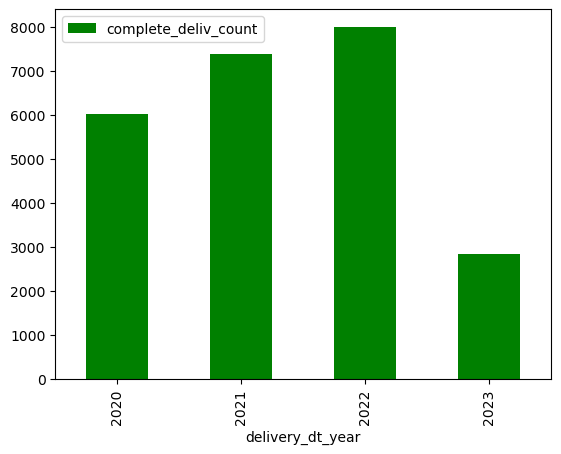

In [59]:
true = complete_deliv.plot.bar('delivery_dt_year',color = 'green')

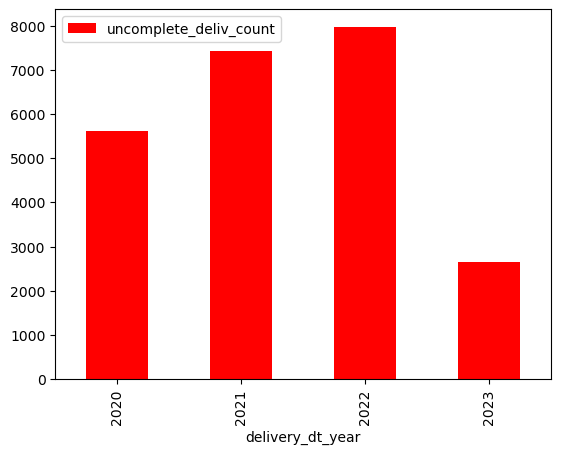

In [60]:
false = uncomplete_deliv.plot.bar('delivery_dt_year',color = 'red')